In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# libraries for web scrapping 
import requests 
from bs4 import BeautifulSoup
from selenium import webdriver 

import time 
import re

# Print all the output without using print 
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# Link of the flipkart website for mobiles
URL = 'https://www.flipkart.com/search?q=mobiles&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_2_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_2_0_na_na_na&as-pos=2&as-type=HISTORY&suggestionId=mobiles&requestId=ee16a293-ce2c-445c-bcbf-cd9c8d4c8fcf'

In [3]:
page = requests.get(URL)

In [4]:
# check the status code

page.status_code

# 200 means we can scrape the data from the website 

200

In [5]:
# get the HTML code from the url 

pagecontent = page.text
print(pagecontent)

<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.07395f.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.png"/><link rel="apple-touch-icon" sizes="72x72" href="/apple-touch-icon-72x72.png"/><link rel="apple-t

In [6]:
# BeautifulSoup is used for getting data out of HTML,XML and other markup language.
soup = BeautifulSoup(pagecontent,'lxml')
print(soup)

<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.07395f.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><meta content="noodp" name="robots"/><link href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:site_name"/><link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/><link href="/apple-touch-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/><link href="/appl

In [7]:
# All the mobile details are present in div tag and class attribute.
product_details = soup.findAll('div',attrs={'class':'_2kHMtA'})

In [8]:
# Extracting all the details one by one
for product in product_details:
    #title
    i = product.find('div',attrs={'class':'_4rR01T'})
    print(i.text)
    
    #rating
    j = product.find('div',attrs={'class':'_3LWZlK'})
    if j is None:
        print(np.NaN)
    else:
        print(j.text)
        
    # reviews and rating
    k = product.find('span',attrs={'class':'_2_R_DZ'})
    if k is None:
        print(np.NaN)
    else:
        print(k.text)
        
    # price
    l = product.find('div',attrs={'class':'_30jeq3 _1_WHN1'})
    if l is None:
        print(np.NaN)
    else:
        print(l.text)
        
     # discount 
    m = product.find('div',attrs={'class':'_3Ay6Sb'})
    if m is None:
        print(np.NaN)
    else:
        print(m.text)
         
    # features 
    n = product.find('ul',attrs={'class':'_1xgFaf'})
    if n is None:
        print(np.NaN)
    else:
        print(n.text)
        
    # original_price 
    o = product.find('div',attrs={'class':'_3I9_wc _27UcVY'})
    if o is None:
        print(np.NaN)
    else:
        print(o.text)
    
    print('----'*30)
    

POCO M3 (Yellow, 64 GB)
4.3
1,02,194 Ratings & 7,927 Reviews
₹10,999
15% off
6 GB RAM | 64 GB ROM | Expandable Upto 512 GB16.59 cm (6.53 inch) Full HD+ Display48MP + 2MP + 2MP | 8MP Front Camera6000 mAh Lithium-ion Polymer BatteryQualcomm Snapdragon 662 ProcessorOne Year Warranty for Handset, 6 Months for Accessories
₹12,999
------------------------------------------------------------------------------------------------------------------------
Infinix Hot 10 (Amber Red, 128 GB)
4.3
66,157 Ratings & 6,771 Reviews
₹10,999
21% off
6 GB RAM | 128 GB ROM | Expandable Upto 256 GB17.22 cm (6.78 inch) HD+ Display16MP + 2MP + 2MP + Low Light Sensor | 8MP Front Camera5200 mAh Li-ion Polymer BatteryMediaTek Helio G70 Processor1 Year on Handset and 6 Months on Accessories
₹13,999
------------------------------------------------------------------------------------------------------------------------
POCO M3 (Power Black, 128 GB)
4.3
1,02,194 Ratings & 7,927 Reviews
₹11,999
20% off
6 GB RAM | 128 GB

In [9]:
# Executed with time 
title=[]
rating=[]
RnR=[]
price=[]
discount=[]
features=[]
original_price=[]
pgno=[]

for x in range(1,20):
    start_time = time.time()
    URL ='https://www.flipkart.com/search?q=mobiles&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_1_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_1_0_na_na_na&as-pos=1&as-type=TRENDING&suggestionId=mobiles&requestId=ee16a293-ce2c-445c-bcbf-cd9c8d4c8fcf'
    page = requests.get(URL)
    pagecontent = page.text
    soup = BeautifulSoup(pagecontent)
    
    product_details = soup.findAll('div',attrs={'class':'_2kHMtA'})
    
    for product in product_details:
    
        #title
        i = product.find('div',attrs={'class':'_4rR01T'})
        if i is None:
            title.append(np.NaN)
        else:
            title.append(i.text)
    
        #rating
        j = product.find('div',attrs={'class':'_3LWZlK'})
        if j is None:
            rating.append(np.NaN)
        else:
            rating.append(j.text)
        
        # reviews and rating
        k = product.find('span',attrs={'class':'_2_R_DZ'})
        if k is None:
            RnR.append(np.NaN)
        else:
            RnR.append(k.text)
        
        # price
        l = product.find('div',attrs={'class':'_30jeq3 _1_WHN1'})
        if l is None:
            price.append(np.NaN)
        else:
            price.append(l.text)
        
        # discount 
        m = product.find('div',attrs={'class':'_3Ay6Sb'})
        if m is None:
            discount.append(np.NaN)
        else:
            discount.append(m.text)
         
        # features 
        f = []
        n = product.find('ul',attrs={'class':'_1xgFaf'})
        for li in n:
            f.append(li.text)
        features.append(f)
        
        # original_price 
        o = product.find('div',attrs={'class':'_3I9_wc _27UcVY'})
        if o is None:
            original_price.append(np.NaN)
        else:
            original_price.append(o.text)
    
        pgno.append(x)
    
    end_time = time.time()
    print('Page {} completed in {} seconds'.format(x,end_time-start_time))

C:\Users\computer world\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\computer world\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


Page 1 completed in 1.5292809009552002 seconds
Page 2 completed in 0.9528079032897949 seconds
Page 3 completed in 1.0079996585845947 seconds
Page 4 completed in 0.8440585136413574 seconds
Page 5 completed in 1.256779432296753 seconds
Page 6 completed in 0.8473801612854004 seconds
Page 7 completed in 1.0343515872955322 seconds
Page 8 completed in 1.0837087631225586 seconds
Page 9 completed in 1.0623080730438232 seconds
Page 10 completed in 1.011603593826294 seconds
Page 11 completed in 1.1230123043060303 seconds
Page 12 completed in 1.0100877285003662 seconds
Page 13 completed in 0.8530387878417969 seconds
Page 14 completed in 1.0360040664672852 seconds
Page 15 completed in 0.9365458488464355 seconds
Page 16 completed in 0.8958272933959961 seconds
Page 17 completed in 0.7708737850189209 seconds
Page 18 completed in 0.7950878143310547 seconds
Page 19 completed in 0.9128530025482178 seconds


In [10]:
# Create a dataframe with column names
df = pd.DataFrame({'Mobile_name':title,'Rating':rating,'Reviews_Rating':RnR,'Price':price,'Discount':discount,'Features':features,'Original_price':original_price})

In [11]:
# Created dataframe
df

Mobile_name Rating  \
0                   POCO M3 (Yellow, 64 GB)    4.3   
1        Infinix Hot 10 (Amber Red, 128 GB)    4.3   
2             POCO M3 (Power Black, 128 GB)    4.3   
3    Infinix Hot 10 (Obsidian Black, 64 GB)    4.4   
4          OPPO A12 (Flowing Silver, 32 GB)    4.3   
..                                      ...    ...   
451          realme C21 (Cross Blue, 32 GB)    4.3   
452          realme C12 (Power Blue, 32 GB)    4.4   
453        realme C12 (Power Silver, 32 GB)    4.4   
454   realme Narzo 20 (Glory Silver, 64 GB)    4.3   
455                       SAMSUNG Guru 1200    4.3   

                        Reviews_Rating    Price Discount  \
0     1,02,194 Ratings & 7,927 Reviews  ₹10,999  15% off   
1       66,157 Ratings & 6,771 Reviews  ₹10,999  21% off   
2     1,02,194 Ratings & 7,927 Reviews  ₹11,999  20% off   
3       56,771 Ratings & 4,580 Reviews   ₹9,499  20% off   
4       32,864 Ratings & 2,253 Reviews   ₹7,990  27% off   
..                                 ...      ...      ...   
451        2,140 Ratings & 116 Reviews   ₹7,999  20% off   
452  2,65,448 Ratings & 16,291 Reviews   ₹7,999  27% off   
453  2,65,448 Ratings & 16,291 Reviews   ₹7,999  27% off   
454  3,93,393 Ratings & 30,735 Reviews  ₹10,499  19% off   
455  1,55,122 Ratings & 13,912 Reviews   ₹1,329   1% off   

                                              Features Original_price  
0    [6 GB RAM | 64 GB ROM | Expandable Upto 512 GB...        ₹12,999  
1    [6 GB RAM | 128 GB ROM | Expandable Upto 256 G...        ₹13,999  
2    [6 GB RAM | 128 GB ROM | Expandable Upto 512 G...        ₹14,999  
3    [4 GB RAM | 64 GB ROM | Expandable Upto 256 GB...        ₹11,999  
4    [3 GB RAM | 32 GB ROM | Expandable Upto 256 GB...        ₹10,990  
..                                                 ...            ...  
451  [3 GB RAM | 32 GB ROM | Expandable Upto 256 GB...         ₹9,999  
452  [3 GB RAM | 32 GB ROM | Expandable Upto 256 GB...        ₹10,999  
453  [3 GB RAM | 32 GB ROM | Expandable Upto 256 GB...        ₹10,999  
454  [4 GB RAM | 64 GB ROM | Expandable Upto 256 GB...        ₹12,999  
455  [NA ROM, 3.81 cm (1.5 inch) NA Display, 800 mA...         ₹1,350  

[456 rows x 7 columns]

#### Extract the information from the above dataframe

- Processor
- Brand
- RAM
- Battery

In [12]:
# How many specific values are there in the dataframe.
df.Features.apply(lambda x:x[0]).value_counts()
df.Features.apply(lambda x:x[1]).value_counts()
df.Features.apply(lambda x:x[2]).value_counts()
df.Features.apply(lambda x:x[3]).value_counts()

4 GB RAM | 64 GB ROM | Expandable Upto 256 GB     98
3 GB RAM | 32 GB ROM | Expandable Upto 256 GB     95
2 GB RAM | 32 GB ROM | Expandable Upto 256 GB     38
4 GB RAM | 64 GB ROM | Expandable Upto 512 GB     38
8 GB RAM | 128 GB ROM | Expandable Upto 1 TB      38
NA ROM                                            38
4 GB RAM | 128 GB ROM | Expandable Upto 1 TB      35
6 GB RAM | 128 GB ROM | Expandable Upto 512 GB    19
6 GB RAM | 64 GB ROM | Expandable Upto 512 GB     19
6 GB RAM | 128 GB ROM | Expandable Upto 256 GB    19
4 MB RAM | 4 MB ROM                               19
Name: Features, dtype: int64

16.51 cm (6.5 inch) HD+ Display            79
16.51 cm (6.5 inch) Full HD+ Display       73
16.56 cm (6.52 inch) HD+ Display           57
17.22 cm (6.78 inch) HD+ Display           57
3.81 cm (1.5 inch) NA Display              38
17.32 cm (6.82 inch) HD+ Display           38
16.59 cm (6.53 inch) Full HD+ Display      38
16.59 cm (6.53 inch) HD+ Display           38
15.8 cm (6.22 inch) HD+ Display            19
4.5 cm (1.77 inch) Quarter QVGA Display    19
Name: Features, dtype: int64

13MP + 2MP + 2MP | 5MP Front Camera                       98
48MP + 2MP + 2MP | 16MP Front Camera                      73
16MP + 2MP + 2MP + Low Light Sensor | 8MP Front Camera    57
13MP + Depth Sensor | 8MP Front Camera                    38
8MP Rear Camera | 5MP Front Camera                        38
48MP + 2MP + 2MP | 8MP Front Camera                       38
800 mAh Battery                                           38
800 mAh Lithium Ion Battery                               19
48MP + 8MP + 2MP | 8MP Front Camera                       19
13MP Rear Camera | 5MP Front Camera                       19
13MP + 2MP | 5MP Front Camera                             19
Name: Features, dtype: int64

5000 mAh Battery                                 152
5200 mAh Li-ion Polymer Battery                   57
6000 mAh Lithium-ion Battery                      57
6000 mAh Li-ion Polymer Battery                   38
6000 mAh Lithium-ion Polymer Battery              38
5000 mAh Li-ion Polymer Battery                   19
5000 mAh Lithium Polymer Battery                  19
Brand Warranty of 1 Year Available for Mobile     19
4230 mAh Battery                                  19
1 Year for Mobile & 6 Months for Accessories      19
0 0 0 0 Processor Processor                       19
Name: Features, dtype: int64

In [13]:
# converting list into strings

df.Features = df.Features.apply(lambda x:','.join(x))

In [14]:
df.Features.head()

0    6 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...
1    6 GB RAM | 128 GB ROM | Expandable Upto 256 GB...
2    6 GB RAM | 128 GB ROM | Expandable Upto 512 GB...
3    4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,...
4    3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,...
Name: Features, dtype: object

In [15]:
print(df.Features[0])
print(df.Features[20])
print(df.Features[100])

6 GB RAM | 64 GB ROM | Expandable Upto 512 GB,16.59 cm (6.53 inch) Full HD+ Display,48MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Polymer Battery,Qualcomm Snapdragon 662 Processor,One Year Warranty for Handset, 6 Months for Accessories
3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,16.56 cm (6.52 inch) HD+ Display,13MP + 2MP + 2MP | 5MP Front Camera,6000 mAh Lithium-ion Battery,Mediatek Helio G35 Processor,Brand Warranty of 1 Year Available for Mobile and 6 Months for Accessories
3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,15.8 cm (6.22 inch) HD+ Display,13MP + 2MP | 5MP Front Camera,4230 mAh Battery,MediaTek Helio P35 Processor,Brand Warranty of 1 Year Available for Mobile Including Battery and 6 Months for Accessories


In [16]:
print(df.Features[0])

6 GB RAM | 64 GB ROM | Expandable Upto 512 GB,16.59 cm (6.53 inch) Full HD+ Display,48MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Polymer Battery,Qualcomm Snapdragon 662 Processor,One Year Warranty for Handset, 6 Months for Accessories


#### Regular Expression

In [17]:
# Processor 
Processor_regex = re.compile(r'[A-Za-z0-9\s]+Processor')
Processor_regex.findall(df.Features[0][4])

df['Processor']=df.Features.apply(lambda x:Processor_regex.findall(x))
df['Processor']

[]

0      [Qualcomm Snapdragon 662 Processor]
1           [MediaTek Helio G70 Processor]
2      [Qualcomm Snapdragon 662 Processor]
3           [MediaTek Helio G70 Processor]
4           [MediaTek Helio P35 Processor]
                      ...                 
451         [MediaTek Helio G35 Processor]
452         [Mediatek Helio G35 Processor]
453         [Mediatek Helio G35 Processor]
454         [MediaTek Helio G85 Processor]
455                                     []
Name: Processor, Length: 456, dtype: object

In [18]:
#RAM & ROM
RAM_regex = re.compile(r'[A-Za-z0-9\s]+(?:RAM|ROM)')
RAM_regex.findall(df.Features[0])
 
df['RAM_ROM']=df.Features.apply(lambda x:RAM_regex.findall(x))
df['RAM_ROM']

['6 GB RAM', ' 64 GB ROM']

0       [6 GB RAM,  64 GB ROM]
1      [6 GB RAM,  128 GB ROM]
2      [6 GB RAM,  128 GB ROM]
3       [4 GB RAM,  64 GB ROM]
4       [3 GB RAM,  32 GB ROM]
                ...           
451     [3 GB RAM,  32 GB ROM]
452     [3 GB RAM,  32 GB ROM]
453     [3 GB RAM,  32 GB ROM]
454     [4 GB RAM,  64 GB ROM]
455                   [NA ROM]
Name: RAM_ROM, Length: 456, dtype: object

In [19]:
# Brand 
brand_regex = re.compile(r'^\w+')
brand_regex.findall(df.Mobile_name[0])

df['Brand']= df.Mobile_name.apply(lambda x:brand_regex.findall(x))
df['Brand']

['POCO']

0         [POCO]
1      [Infinix]
2         [POCO]
3      [Infinix]
4         [OPPO]
         ...    
451     [realme]
452     [realme]
453     [realme]
454     [realme]
455    [SAMSUNG]
Name: Brand, Length: 456, dtype: object

In [20]:
# battery

battery_regex = re.compile(r'[A-Za-z0-9\s-]+Battery')
battery_regex.findall(df.Features[0])

df['Battery']=df.Features.apply(lambda x:battery_regex.findall(x))
df['Battery']

['6000 mAh Lithium-ion Polymer Battery']

0                 [6000 mAh Lithium-ion Polymer Battery]
1                      [5200 mAh Li-ion Polymer Battery]
2                 [6000 mAh Lithium-ion Polymer Battery]
3                      [5200 mAh Li-ion Polymer Battery]
4      [4230 mAh Battery, Brand Warranty of 1 Year Av...
                             ...                        
451                                   [5000 mAh Battery]
452                       [6000 mAh Lithium-ion Battery]
453                       [6000 mAh Lithium-ion Battery]
454                       [6000 mAh Lithium-ion Battery]
455                                    [800 mAh Battery]
Name: Battery, Length: 456, dtype: object

In [21]:
# Final dataframe with 11 columns and 456 rows
df

Mobile_name Rating  \
0                   POCO M3 (Yellow, 64 GB)    4.3   
1        Infinix Hot 10 (Amber Red, 128 GB)    4.3   
2             POCO M3 (Power Black, 128 GB)    4.3   
3    Infinix Hot 10 (Obsidian Black, 64 GB)    4.4   
4          OPPO A12 (Flowing Silver, 32 GB)    4.3   
..                                      ...    ...   
451          realme C21 (Cross Blue, 32 GB)    4.3   
452          realme C12 (Power Blue, 32 GB)    4.4   
453        realme C12 (Power Silver, 32 GB)    4.4   
454   realme Narzo 20 (Glory Silver, 64 GB)    4.3   
455                       SAMSUNG Guru 1200    4.3   

                        Reviews_Rating    Price Discount  \
0     1,02,194 Ratings & 7,927 Reviews  ₹10,999  15% off   
1       66,157 Ratings & 6,771 Reviews  ₹10,999  21% off   
2     1,02,194 Ratings & 7,927 Reviews  ₹11,999  20% off   
3       56,771 Ratings & 4,580 Reviews   ₹9,499  20% off   
4       32,864 Ratings & 2,253 Reviews   ₹7,990  27% off   
..                                 ...      ...      ...   
451        2,140 Ratings & 116 Reviews   ₹7,999  20% off   
452  2,65,448 Ratings & 16,291 Reviews   ₹7,999  27% off   
453  2,65,448 Ratings & 16,291 Reviews   ₹7,999  27% off   
454  3,93,393 Ratings & 30,735 Reviews  ₹10,499  19% off   
455  1,55,122 Ratings & 13,912 Reviews   ₹1,329   1% off   

                                              Features Original_price  \
0    6 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...        ₹12,999   
1    6 GB RAM | 128 GB ROM | Expandable Upto 256 GB...        ₹13,999   
2    6 GB RAM | 128 GB ROM | Expandable Upto 512 GB...        ₹14,999   
3    4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,...        ₹11,999   
4    3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,...        ₹10,990   
..                                                 ...            ...   
451  3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,...         ₹9,999   
452  3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,...        ₹10,999   
453  3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,...        ₹10,999   
454  4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,...        ₹12,999   
455  NA ROM,3.81 cm (1.5 inch) NA Display,800 mAh B...         ₹1,350   

                               Processor                  RAM_ROM      Brand  \
0    [Qualcomm Snapdragon 662 Processor]   [6 GB RAM,  64 GB ROM]     [POCO]   
1         [MediaTek Helio G70 Processor]  [6 GB RAM,  128 GB ROM]  [Infinix]   
2    [Qualcomm Snapdragon 662 Processor]  [6 GB RAM,  128 GB ROM]     [POCO]   
3         [MediaTek Helio G70 Processor]   [4 GB RAM,  64 GB ROM]  [Infinix]   
4         [MediaTek Helio P35 Processor]   [3 GB RAM,  32 GB ROM]     [OPPO]   
..                                   ...                      ...        ...   
451       [MediaTek Helio G35 Processor]   [3 GB RAM,  32 GB ROM]   [realme]   
452       [Mediatek Helio G35 Processor]   [3 GB RAM,  32 GB ROM]   [realme]   
453       [Mediatek Helio G35 Processor]   [3 GB RAM,  32 GB ROM]   [realme]   
454       [MediaTek Helio G85 Processor]   [4 GB RAM,  64 GB ROM]   [realme]   
455                                   []                 [NA ROM]  [SAMSUNG]   

                                               Battery  
0               [6000 mAh Lithium-ion Polymer Battery]  
1                    [5200 mAh Li-ion Polymer Battery]  
2               [6000 mAh Lithium-ion Polymer Battery]  
3                    [5200 mAh Li-ion Polymer Battery]  
4    [4230 mAh Battery, Brand Warranty of 1 Year Av...  
..                                                 ...  
451                                 [5000 mAh Battery]  
452                     [6000 mAh Lithium-ion Battery]  
453                     [6000 mAh Lithium-ion Battery]  
454                     [6000 mAh Lithium-ion Battery]  
455                                  [800 mAh Battery]  

[456 rows x 11 columns]

In [22]:
# Check for the null values
df.isnull().sum()

Mobile_name        0
Rating             0
Reviews_Rating     0
Price              0
Discount          19
Features           0
Original_price    19
Processor          0
RAM_ROM            0
Brand              0
Battery            0
dtype: int64

In [23]:
# Information about the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Mobile_name     456 non-null    object
 1   Rating          456 non-null    object
 2   Reviews_Rating  456 non-null    object
 3   Price           456 non-null    object
 4   Discount        437 non-null    object
 5   Features        456 non-null    object
 6   Original_price  437 non-null    object
 7   Processor       456 non-null    object
 8   RAM_ROM         456 non-null    object
 9   Brand           456 non-null    object
 10  Battery         456 non-null    object
dtypes: object(11)
memory usage: 39.3+ KB


#### Converting the dataframe to excel file

In [24]:
df.to_csv('mobiles.csv')

In [25]:
# converting string to float 

df['Price']=df['Price'].apply(str).str.replace('₹', '').str.replace(',','').astype(float)
df['Price']

0      10999.0
1      10999.0
2      11999.0
3       9499.0
4       7990.0
        ...   
451     7999.0
452     7999.0
453     7999.0
454    10499.0
455     1329.0
Name: Price, Length: 456, dtype: float64

In [26]:
df['Original_price']=df['Original_price'].apply(str).str.replace('₹', '').str.replace(',','').astype(float)
df['Original_price']

0      12999.0
1      13999.0
2      14999.0
3      11999.0
4      10990.0
        ...   
451     9999.0
452    10999.0
453    10999.0
454    12999.0
455     1350.0
Name: Original_price, Length: 456, dtype: float64

In [27]:
df['Rating']=df['Rating'].astype(str).str.replace('','').astype(float)
df['Rating']

0      4.3
1      4.3
2      4.3
3      4.4
4      4.3
      ... 
451    4.3
452    4.4
453    4.4
454    4.3
455    4.3
Name: Rating, Length: 456, dtype: float64

In [28]:
# converting list to string 
df.Mobile_name = df.Mobile_name.apply(lambda x:''.join(x))
df.Reviews_Rating = df.Reviews_Rating.apply(lambda x:''.join(x))
#df.Discount = df.Discount.apply(lambda x:''.join(x))
df.Features = df.Features.apply(lambda x:''.join(x))
df.Processor = df.Processor.apply(lambda x:''.join(x))
df.RAM_ROM = df.RAM_ROM.apply(lambda x:''.join(x))
df.Brand = df.Brand.apply(lambda x:''.join(x))
df.Battery = df.Battery.apply(lambda x:''.join(x))

In [29]:
df[df['Price']<=10000]

Mobile_name  Rating  \
3    Infinix Hot 10 (Obsidian Black, 64 GB)     4.4   
4          OPPO A12 (Flowing Silver, 32 GB)     4.3   
6                REDMI 9i (Sea Blue, 64 GB)     4.3   
7    Infinix Hot 10 (Moonlight Jade, 64 GB)     4.4   
8              POCO C3 (Matte Black, 64 GB)     4.3   
..                                      ...     ...   
450         realme C21 (Cross Black, 32 GB)     4.3   
451          realme C21 (Cross Blue, 32 GB)     4.3   
452          realme C12 (Power Blue, 32 GB)     4.4   
453        realme C12 (Power Silver, 32 GB)     4.4   
455                       SAMSUNG Guru 1200     4.3   

                        Reviews_Rating   Price Discount  \
3       56,771 Ratings & 4,580 Reviews  9499.0  20% off   
4       32,864 Ratings & 2,253 Reviews  7990.0  27% off   
6    2,65,329 Ratings & 15,029 Reviews  7999.0  20% off   
7       56,771 Ratings & 4,580 Reviews  9499.0  20% off   
8     1,55,458 Ratings & 9,641 Reviews  8499.0  22% off   
..                                 ...     ...      ...   
450        2,140 Ratings & 116 Reviews  7999.0  20% off   
451        2,140 Ratings & 116 Reviews  7999.0  20% off   
452  2,65,448 Ratings & 16,291 Reviews  7999.0  27% off   
453  2,65,448 Ratings & 16,291 Reviews  7999.0  27% off   
455  1,55,122 Ratings & 13,912 Reviews  1329.0   1% off   

                                              Features  Original_price  \
3    4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,...         11999.0   
4    3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,...         10990.0   
6    4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...          9999.0   
7    4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,...         11999.0   
8    4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...         10999.0   
..                                                 ...             ...   
450  3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,...          9999.0   
451  3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,...          9999.0   
452  3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,...         10999.0   
453  3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,...         10999.0   
455  NA ROM,3.81 cm (1.5 inch) NA Display,800 mAh B...          1350.0   

                        Processor             RAM_ROM    Brand  \
3    MediaTek Helio G70 Processor  4 GB RAM 64 GB ROM  Infinix   
4    MediaTek Helio P35 Processor  3 GB RAM 32 GB ROM     OPPO   
6    MediaTek Helio G25 Processor  4 GB RAM 64 GB ROM    REDMI   
7    MediaTek Helio G70 Processor  4 GB RAM 64 GB ROM  Infinix   
8    Mediatek Helio G35 Processor  4 GB RAM 64 GB ROM     POCO   
..                            ...                 ...      ...   
450  MediaTek Helio G35 Processor  3 GB RAM 32 GB ROM   realme   
451  MediaTek Helio G35 Processor  3 GB RAM 32 GB ROM   realme   
452  Mediatek Helio G35 Processor  3 GB RAM 32 GB ROM   realme   
453  Mediatek Helio G35 Processor  3 GB RAM 32 GB ROM   realme   
455                                            NA ROM  SAMSUNG   

                                               Battery  
3                      5200 mAh Li-ion Polymer Battery  
4    4230 mAh BatteryBrand Warranty of 1 Year Avail...  
6                     5000 mAh Lithium Polymer Battery  
7                      5200 mAh Li-ion Polymer Battery  
8                      5000 mAh Li-ion Polymer Battery  
..                                                 ...  
450                                   5000 mAh Battery  
451                                   5000 mAh Battery  
452                       6000 mAh Lithium-ion Battery  
453                       6000 mAh Lithium-ion Battery  
455                                    800 mAh Battery  

[307 rows x 11 columns]

In [30]:
df[df['Battery']=='5000 mAh Lithium Polymer Battery']

Mobile_name  Rating                     Reviews_Rating  \
6    REDMI 9i (Sea Blue, 64 GB)     4.3  2,65,329 Ratings & 15,029 Reviews   
30   REDMI 9i (Sea Blue, 64 GB)     4.3  2,65,328 Ratings & 15,030 Reviews   
54   REDMI 9i (Sea Blue, 64 GB)     4.3  2,65,330 Ratings & 15,030 Reviews   
78   REDMI 9i (Sea Blue, 64 GB)     4.3  2,65,330 Ratings & 15,030 Reviews   
102  REDMI 9i (Sea Blue, 64 GB)     4.3  2,65,330 Ratings & 15,030 Reviews   
126  REDMI 9i (Sea Blue, 64 GB)     4.3  2,65,330 Ratings & 15,030 Reviews   
150  REDMI 9i (Sea Blue, 64 GB)     4.3  2,65,330 Ratings & 15,030 Reviews   
174  REDMI 9i (Sea Blue, 64 GB)     4.3  2,65,330 Ratings & 15,030 Reviews   
197  REDMI 9i (Sea Blue, 64 GB)     4.3  2,65,329 Ratings & 15,029 Reviews   
222  REDMI 9i (Sea Blue, 64 GB)     4.3  2,65,330 Ratings & 15,030 Reviews   
245  REDMI 9i (Sea Blue, 64 GB)     4.3  2,65,329 Ratings & 15,029 Reviews   
269  REDMI 9i (Sea Blue, 64 GB)     4.3  2,65,329 Ratings & 15,029 Reviews   
294  REDMI 9i (Sea Blue, 64 GB)     4.3  2,65,330 Ratings & 15,030 Reviews   
318  REDMI 9i (Sea Blue, 64 GB)     4.3  2,65,330 Ratings & 15,030 Reviews   
342  REDMI 9i (Sea Blue, 64 GB)     4.3  2,65,330 Ratings & 15,030 Reviews   
366  REDMI 9i (Sea Blue, 64 GB)     4.3  2,65,330 Ratings & 15,030 Reviews   
390  REDMI 9i (Sea Blue, 64 GB)     4.3  2,65,330 Ratings & 15,030 Reviews   
414  REDMI 9i (Sea Blue, 64 GB)     4.3  2,65,330 Ratings & 15,030 Reviews   
438  REDMI 9i (Sea Blue, 64 GB)     4.3  2,65,330 Ratings & 15,030 Reviews   

      Price Discount                                           Features  \
6    7999.0  20% off  4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...   
30   7999.0  20% off  4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...   
54   7999.0  20% off  4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...   
78   7999.0  20% off  4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...   
102  7999.0  20% off  4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...   
126  7999.0  20% off  4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...   
150  7999.0  20% off  4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...   
174  7999.0  20% off  4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...   
197  7999.0  20% off  4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...   
222  7999.0  20% off  4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...   
245  7999.0  20% off  4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...   
269  7999.0  20% off  4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...   
294  7999.0  20% off  4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...   
318  7999.0  20% off  4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...   
342  7999.0  20% off  4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...   
366  7999.0  20% off  4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...   
390  7999.0  20% off  4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...   
414  7999.0  20% off  4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...   
438  7999.0  20% off  4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...   

     Original_price                     Processor             RAM_ROM  Brand  \
6            9999.0  MediaTek Helio G25 Processor  4 GB RAM 64 GB ROM  REDMI   
30           9999.0  MediaTek Helio G25 Processor  4 GB RAM 64 GB ROM  REDMI   
54           9999.0  MediaTek Helio G25 Processor  4 GB RAM 64 GB ROM  REDMI   
78           9999.0  MediaTek Helio G25 Processor  4 GB RAM 64 GB ROM  REDMI   
102          9999.0  MediaTek Helio G25 Processor  4 GB RAM 64 GB ROM  REDMI   
126          9999.0  MediaTek Helio G25 Processor  4 GB RAM 64 GB ROM  REDMI   
150          9999.0  MediaTek Helio G25 Processor  4 GB RAM 64 GB ROM  REDMI   
174          9999.0  MediaTek Helio G25 Processor  4 GB RAM 64 GB ROM  REDMI   
197          9999.0  MediaTek Helio G25 Processor  4 GB RAM 64 GB ROM  REDMI   
222          9999.0  MediaTek Helio G25 Processor  4 GB RAM 64 GB ROM  REDMI   
245          9999.0  MediaTek Helio G25 Processor  4 GB RAM 64 GB ROM  REDMI  

In [31]:
df[df['RAM_ROM']=='4 GB RAM 64 GB ROM']

Mobile_name  Rating  \
3        Infinix Hot 10 (Obsidian Black, 64 GB)     4.4   
6                    REDMI 9i (Sea Blue, 64 GB)     4.3   
7        Infinix Hot 10 (Moonlight Jade, 64 GB)     4.4   
8                  POCO C3 (Matte Black, 64 GB)     4.3   
10   Infinix Hot 10 Play (Morandi Green, 64 GB)     4.5   
..                                          ...     ...   
439      Infinix Hot 10 (Moonlight Jade, 64 GB)     4.4   
441    Infinix Hot 10 Play (Aegean Blue, 64 GB)     4.5   
442  Infinix Hot 10 Play (Morandi Green, 64 GB)     4.5   
449                POCO C3 (Matte Black, 64 GB)     4.3   
454       realme Narzo 20 (Glory Silver, 64 GB)     4.3   

                        Reviews_Rating    Price Discount  \
3       56,771 Ratings & 4,580 Reviews   9499.0  20% off   
6    2,65,329 Ratings & 15,029 Reviews   7999.0  20% off   
7       56,771 Ratings & 4,580 Reviews   9499.0  20% off   
8     1,55,458 Ratings & 9,641 Reviews   8499.0  22% off   
10          1,138 Ratings & 85 Reviews   8499.0  22% off   
..                                 ...      ...      ...   
439     56,772 Ratings & 4,583 Reviews   9499.0  20% off   
441         1,141 Ratings & 91 Reviews   8499.0  22% off   
442         1,141 Ratings & 91 Reviews   8499.0  22% off   
449   1,55,461 Ratings & 9,639 Reviews   8499.0  22% off   
454  3,93,393 Ratings & 30,735 Reviews  10499.0  19% off   

                                              Features  Original_price  \
3    4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,...         11999.0   
6    4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...          9999.0   
7    4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,...         11999.0   
8    4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...         10999.0   
10   4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,...         10999.0   
..                                                 ...             ...   
439  4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,...         11999.0   
441  4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,...         10999.0   
442  4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,...         10999.0   
449  4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...         10999.0   
454  4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,...         12999.0   

                        Processor             RAM_ROM    Brand  \
3    MediaTek Helio G70 Processor  4 GB RAM 64 GB ROM  Infinix   
6    MediaTek Helio G25 Processor  4 GB RAM 64 GB ROM    REDMI   
7    MediaTek Helio G70 Processor  4 GB RAM 64 GB ROM  Infinix   
8    Mediatek Helio G35 Processor  4 GB RAM 64 GB ROM     POCO   
10   MediaTek Helio G35 Processor  4 GB RAM 64 GB ROM  Infinix   
..                            ...                 ...      ...   
439  MediaTek Helio G70 Processor  4 GB RAM 64 GB ROM  Infinix   
441  MediaTek Helio G35 Processor  4 GB RAM 64 GB ROM  Infinix   
442  MediaTek Helio G35 Processor  4 GB RAM 64 GB ROM  Infinix   
449  Mediatek Helio G35 Processor  4 GB RAM 64 GB ROM     POCO   
454  MediaTek Helio G85 Processor  4 GB RAM 64 GB ROM   realme   

                              Battery  
3     5200 mAh Li-ion Polymer Battery  
6    5000 mAh Lithium Polymer Battery  
7     5200 mAh Li-ion Polymer Battery  
8     5000 mAh Li-ion Polymer Battery  
10    6000 mAh Li-ion Polymer Battery  
..                                ...  
439   5200 mAh Li-ion Polymer Battery  
441   6000 mAh Li-ion Polymer Battery  
442   6000 mAh Li-ion Polymer Battery  
449   5000 mAh Li-ion Polymer Battery  
454      6000 mAh Lithium-ion Battery  

[136 rows x 11 columns]

In [38]:
df[df['Brand']=='POCO']

Mobile_name  Rating                    Reviews_Rating  \
0          POCO M3 (Yellow, 64 GB)     4.3  1,02,194 Ratings & 7,927 Reviews   
2    POCO M3 (Power Black, 128 GB)     4.3  1,02,194 Ratings & 7,927 Reviews   
8     POCO C3 (Matte Black, 64 GB)     4.3  1,55,458 Ratings & 9,641 Reviews   
24         POCO M3 (Yellow, 64 GB)     4.3  1,02,194 Ratings & 7,943 Reviews   
26   POCO M3 (Power Black, 128 GB)     4.3  1,02,194 Ratings & 7,943 Reviews   
41    POCO C3 (Matte Black, 64 GB)     4.3  1,55,461 Ratings & 9,639 Reviews   
48         POCO M3 (Yellow, 64 GB)     4.3  1,02,195 Ratings & 7,943 Reviews   
50   POCO M3 (Power Black, 128 GB)     4.3  1,02,195 Ratings & 7,943 Reviews   
65    POCO C3 (Matte Black, 64 GB)     4.3  1,55,461 Ratings & 9,639 Reviews   
72         POCO M3 (Yellow, 64 GB)     4.3  1,02,193 Ratings & 7,943 Reviews   
74   POCO M3 (Power Black, 128 GB)     4.3  1,02,193 Ratings & 7,943 Reviews   
89    POCO C3 (Matte Black, 64 GB)     4.3  1,55,461 Ratings & 9,639 Reviews   
96         POCO M3 (Yellow, 64 GB)     4.3  1,02,194 Ratings & 7,943 Reviews   
98   POCO M3 (Power Black, 128 GB)     4.3  1,02,194 Ratings & 7,943 Reviews   
113   POCO C3 (Matte Black, 64 GB)     4.3  1,55,461 Ratings & 9,639 Reviews   
120        POCO M3 (Yellow, 64 GB)     4.3  1,02,194 Ratings & 7,943 Reviews   
122  POCO M3 (Power Black, 128 GB)     4.3  1,02,194 Ratings & 7,943 Reviews   
137   POCO C3 (Matte Black, 64 GB)     4.3  1,55,461 Ratings & 9,639 Reviews   
144        POCO M3 (Yellow, 64 GB)     4.3  1,02,194 Ratings & 7,943 Reviews   
146  POCO M3 (Power Black, 128 GB)     4.3  1,02,194 Ratings & 7,943 Reviews   
161   POCO C3 (Matte Black, 64 GB)     4.3  1,55,461 Ratings & 9,639 Reviews   
168        POCO M3 (Yellow, 64 GB)     4.3  1,02,193 Ratings & 7,943 Reviews   
170  POCO M3 (Power Black, 128 GB)     4.3  1,02,193 Ratings & 7,943 Reviews   
185   POCO C3 (Matte Black, 64 GB)     4.3  1,55,461 Ratings & 9,639 Reviews   
192        POCO M3 (Yellow, 64 GB)     4.3  1,02,194 Ratings & 7,927 Reviews   
194  POCO M3 (Power Black, 128 GB)     4.3  1,02,194 Ratings & 7,927 Reviews   
199   POCO C3 (Matte Black, 64 GB)     4.3  1,55,458 Ratings & 9,641 Reviews   
216        POCO M3 (Yellow, 64 GB)     4.3  1,02,194 Ratings & 7,943 Reviews   
218  POCO M3 (Power Black, 128 GB)     4.3  1,02,194 Ratings & 7,943 Reviews   
233   POCO C3 (Matte Black, 64 GB)     4.3  1,55,461 Ratings & 9,639 Reviews   
240        POCO M3 (Yellow, 64 GB)     4.3  1,02,196 Ratings & 7,927 Reviews   
242  POCO M3 (Power Black, 128 GB)     4.3  1,02,196 Ratings & 7,927 Reviews   
247   POCO C3 (Matte Black, 64 GB)     4.3  1,55,458 Ratings & 9,641 Reviews   
264        POCO M3 (Yellow, 64 GB)     4.3  1,02,196 Ratings & 7,927 Reviews   
266  POCO M3 (Power Black, 128 GB)     4.3  1,02,196 Ratings & 7,927 Reviews   
271   POCO C3 (Matte Black, 64 GB)     4.3  1,55,458 Ratings & 9,641 Reviews   
288        POCO M3 (Yellow, 64 GB)     4.3  1,02,194 Ratings & 7,943 Reviews   
290  POCO M3 (Power Black, 128 GB)     4.3  1,02,194 Ratings & 7,943 Reviews   
305   POCO C3 (Matte Black, 64 GB)     4.3  1,55,461 Ratings & 9,639 Reviews   
312        POCO M3 (Yellow, 64 GB)     4.3  1,02,197 Ratings & 7,943 Reviews   
314  POCO M3 (Power Black, 128 GB)     4.3  1,02,197 Ratings & 7,943 Reviews   
329   POCO C3 (Matte Black, 64 GB)     4.3  1,55,461 Ratings & 9,639 Reviews   
336        POCO M3 (Yellow, 64 GB)     4.3  1,02,197 Ratings & 7,943 Reviews   
338  POCO M3 (Power Black, 128 GB)     4.3  1,02,197 Ratings & 7,943 Reviews   
353   POCO C3 (Matte Black, 64 GB)     4.3  1,55,461 Ratings & 9,639 Reviews   
360        POCO M3 (Yellow, 64 GB)     4.3  1,02,195 Ratings & 7,943 Reviews   
362  POCO M3 (Power Black, 128 GB)     4.3  1,02,195 Ratings & 7,943 Reviews   
377   POCO C3 (Matte Black, 64 GB)     4.3  1,55,461 Ratings & 9,639 Reviews   
384        POCO M3 (Yellow, 64 GB)     4.3  1,02,195 Ratings & 7,943 Reviews   
386  POCO M3 (Power Bla

In [37]:
df[(df['Brand']=='realme')&(df['Rating']==4.5)]

Mobile_name  Rating            Reviews_Rating  \
17    realme 8 5G (Supersonic Blue, 128 GB)     4.5  164 Ratings & 15 Reviews   
19   realme 8 5G (Supersonic Black, 128 GB)     4.5  164 Ratings & 15 Reviews   
39   realme 8 5G (Supersonic Black, 128 GB)     4.5  164 Ratings & 15 Reviews   
40    realme 8 5G (Supersonic Blue, 128 GB)     4.5  164 Ratings & 15 Reviews   
63   realme 8 5G (Supersonic Black, 128 GB)     4.5  164 Ratings & 15 Reviews   
64    realme 8 5G (Supersonic Blue, 128 GB)     4.5  164 Ratings & 15 Reviews   
87   realme 8 5G (Supersonic Black, 128 GB)     4.5  164 Ratings & 15 Reviews   
88    realme 8 5G (Supersonic Blue, 128 GB)     4.5  164 Ratings & 15 Reviews   
111  realme 8 5G (Supersonic Black, 128 GB)     4.5  164 Ratings & 15 Reviews   
112   realme 8 5G (Supersonic Blue, 128 GB)     4.5  164 Ratings & 15 Reviews   
135  realme 8 5G (Supersonic Black, 128 GB)     4.5  164 Ratings & 15 Reviews   
136   realme 8 5G (Supersonic Blue, 128 GB)     4.5  164 Ratings & 15 Reviews   
159  realme 8 5G (Supersonic Black, 128 GB)     4.5  164 Ratings & 15 Reviews   
160   realme 8 5G (Supersonic Blue, 128 GB)     4.5  164 Ratings & 15 Reviews   
183  realme 8 5G (Supersonic Black, 128 GB)     4.5  164 Ratings & 15 Reviews   
184   realme 8 5G (Supersonic Blue, 128 GB)     4.5  164 Ratings & 15 Reviews   
208   realme 8 5G (Supersonic Blue, 128 GB)     4.5  164 Ratings & 15 Reviews   
210  realme 8 5G (Supersonic Black, 128 GB)     4.5  164 Ratings & 15 Reviews   
231  realme 8 5G (Supersonic Black, 128 GB)     4.5  164 Ratings & 15 Reviews   
232   realme 8 5G (Supersonic Blue, 128 GB)     4.5  164 Ratings & 15 Reviews   
256   realme 8 5G (Supersonic Blue, 128 GB)     4.5  164 Ratings & 15 Reviews   
258  realme 8 5G (Supersonic Black, 128 GB)     4.5  164 Ratings & 15 Reviews   
280   realme 8 5G (Supersonic Blue, 128 GB)     4.5  164 Ratings & 15 Reviews   
282  realme 8 5G (Supersonic Black, 128 GB)     4.5  164 Ratings & 15 Reviews   
303  realme 8 5G (Supersonic Black, 128 GB)     4.5  164 Ratings & 15 Reviews   
304   realme 8 5G (Supersonic Blue, 128 GB)     4.5  164 Ratings & 15 Reviews   
327  realme 8 5G (Supersonic Black, 128 GB)     4.5  164 Ratings & 15 Reviews   
328   realme 8 5G (Supersonic Blue, 128 GB)     4.5  164 Ratings & 15 Reviews   
351  realme 8 5G (Supersonic Black, 128 GB)     4.5  164 Ratings & 15 Reviews   
352   realme 8 5G (Supersonic Blue, 128 GB)     4.5  164 Ratings & 15 Reviews   
375  realme 8 5G (Supersonic Black, 128 GB)     4.5  164 Ratings & 15 Reviews   
376   realme 8 5G (Supersonic Blue, 128 GB)     4.5  164 Ratings & 15 Reviews   
399  realme 8 5G (Supersonic Black, 128 GB)     4.5  164 Ratings & 15 Reviews   
400   realme 8 5G (Supersonic Blue, 128 GB)     4.5  164 Ratings & 15 Reviews   
423  realme 8 5G (Supersonic Black, 128 GB)     4.5  164 Ratings & 15 Reviews   
424   realme 8 5G (Supersonic Blue, 128 GB)     4.5  164 Ratings & 15 Reviews   
447  realme 8 5G (Supersonic Black, 128 GB)     4.5  164 Ratings & 15 Reviews   
448   realme 8 5G (Supersonic Blue, 128 GB)     4.5  164 Ratings & 15 Reviews   

       Price Discount                                           Features  \
17   16999.0  10% off  8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...   
19   16999.0  10% off  8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...   
39   16999.0  10% off  8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...   
40   16999.0  10% off  8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...   
63   16999.0  10% off  8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...   
64   16999.0  10% off  8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...   
87   16999.0  10% off  8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...   
88   16999.0  10% off  8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...   
111  16999.0  10% off  8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...   
112  16999.0  10% off  8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...   
135  16999.0  10% off  8 GB RAM | 12

In [43]:
df[(df['Discount']=='20% off')&(df['Battery']=='5000 mAh Battery')]

Mobile_name  Rating               Reviews_Rating  \
15    realme C21 (Cross Blue, 32 GB)     4.3  2,138 Ratings & 112 Reviews   
16   realme C21 (Cross Black, 32 GB)     4.3  2,138 Ratings & 112 Reviews   
42   realme C21 (Cross Black, 32 GB)     4.3  2,140 Ratings & 116 Reviews   
43    realme C21 (Cross Blue, 32 GB)     4.3  2,140 Ratings & 116 Reviews   
66   realme C21 (Cross Black, 32 GB)     4.3  2,140 Ratings & 116 Reviews   
67    realme C21 (Cross Blue, 32 GB)     4.3  2,140 Ratings & 116 Reviews   
90   realme C21 (Cross Black, 32 GB)     4.3  2,140 Ratings & 116 Reviews   
91    realme C21 (Cross Blue, 32 GB)     4.3  2,140 Ratings & 116 Reviews   
114  realme C21 (Cross Black, 32 GB)     4.3  2,140 Ratings & 116 Reviews   
115   realme C21 (Cross Blue, 32 GB)     4.3  2,140 Ratings & 116 Reviews   
138  realme C21 (Cross Black, 32 GB)     4.3  2,140 Ratings & 116 Reviews   
139   realme C21 (Cross Blue, 32 GB)     4.3  2,140 Ratings & 116 Reviews   
162  realme C21 (Cross Black, 32 GB)     4.3  2,140 Ratings & 116 Reviews   
163   realme C21 (Cross Blue, 32 GB)     4.3  2,140 Ratings & 116 Reviews   
186  realme C21 (Cross Black, 32 GB)     4.3  2,140 Ratings & 116 Reviews   
187   realme C21 (Cross Blue, 32 GB)     4.3  2,140 Ratings & 116 Reviews   
206   realme C21 (Cross Blue, 32 GB)     4.3  2,138 Ratings & 112 Reviews   
207  realme C21 (Cross Black, 32 GB)     4.3  2,138 Ratings & 112 Reviews   
234  realme C21 (Cross Black, 32 GB)     4.3  2,140 Ratings & 116 Reviews   
235   realme C21 (Cross Blue, 32 GB)     4.3  2,140 Ratings & 116 Reviews   
254   realme C21 (Cross Blue, 32 GB)     4.3  2,138 Ratings & 112 Reviews   
255  realme C21 (Cross Black, 32 GB)     4.3  2,138 Ratings & 112 Reviews   
278   realme C21 (Cross Blue, 32 GB)     4.3  2,138 Ratings & 112 Reviews   
279  realme C21 (Cross Black, 32 GB)     4.3  2,138 Ratings & 112 Reviews   
306  realme C21 (Cross Black, 32 GB)     4.3  2,140 Ratings & 116 Reviews   
307   realme C21 (Cross Blue, 32 GB)     4.3  2,140 Ratings & 116 Reviews   
330  realme C21 (Cross Black, 32 GB)     4.3  2,140 Ratings & 116 Reviews   
331   realme C21 (Cross Blue, 32 GB)     4.3  2,140 Ratings & 116 Reviews   
354  realme C21 (Cross Black, 32 GB)     4.3  2,140 Ratings & 116 Reviews   
355   realme C21 (Cross Blue, 32 GB)     4.3  2,140 Ratings & 116 Reviews   
378  realme C21 (Cross Black, 32 GB)     4.3  2,140 Ratings & 116 Reviews   
379   realme C21 (Cross Blue, 32 GB)     4.3  2,140 Ratings & 116 Reviews   
402  realme C21 (Cross Black, 32 GB)     4.3  2,140 Ratings & 116 Reviews   
403   realme C21 (Cross Blue, 32 GB)     4.3  2,140 Ratings & 116 Reviews   
426  realme C21 (Cross Black, 32 GB)     4.3  2,140 Ratings & 116 Reviews   
427   realme C21 (Cross Blue, 32 GB)     4.3  2,140 Ratings & 116 Reviews   
450  realme C21 (Cross Black, 32 GB)     4.3  2,140 Ratings & 116 Reviews   
451   realme C21 (Cross Blue, 32 GB)     4.3  2,140 Ratings & 116 Reviews   

      Price Discount                                           Features  \
15   7999.0  20% off  3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,...   
16   7999.0  20% off  3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,...   
42   7999.0  20% off  3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,...   
43   7999.0  20% off  3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,...   
66   7999.0  20% off  3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,...   
67   7999.0  20% off  3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,...   
90   7999.0  20% off  3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,...   
91   7999.0  20% off  3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,...   
114  7999.0  20% off  3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,...   
115  7999.0  20% off  3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,...   
138  7999.0  20% off  3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,...   
139  7999.0  20% off  3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,...   
162  7999.0  20% off  3 GB RAM | 32 GB ROM | E

In [53]:
df[(df['RAM_ROM']=='4 GB RAM 64 GB ROM')&(df['Rating']>=4.0)&(df['Brand']=='REDMI')]

Mobile_name  Rating                     Reviews_Rating  \
6    REDMI 9i (Sea Blue, 64 GB)     4.3  2,65,329 Ratings & 15,029 Reviews   
30   REDMI 9i (Sea Blue, 64 GB)     4.3  2,65,328 Ratings & 15,030 Reviews   
54   REDMI 9i (Sea Blue, 64 GB)     4.3  2,65,330 Ratings & 15,030 Reviews   
78   REDMI 9i (Sea Blue, 64 GB)     4.3  2,65,330 Ratings & 15,030 Reviews   
102  REDMI 9i (Sea Blue, 64 GB)     4.3  2,65,330 Ratings & 15,030 Reviews   
126  REDMI 9i (Sea Blue, 64 GB)     4.3  2,65,330 Ratings & 15,030 Reviews   
150  REDMI 9i (Sea Blue, 64 GB)     4.3  2,65,330 Ratings & 15,030 Reviews   
174  REDMI 9i (Sea Blue, 64 GB)     4.3  2,65,330 Ratings & 15,030 Reviews   
197  REDMI 9i (Sea Blue, 64 GB)     4.3  2,65,329 Ratings & 15,029 Reviews   
222  REDMI 9i (Sea Blue, 64 GB)     4.3  2,65,330 Ratings & 15,030 Reviews   
245  REDMI 9i (Sea Blue, 64 GB)     4.3  2,65,329 Ratings & 15,029 Reviews   
269  REDMI 9i (Sea Blue, 64 GB)     4.3  2,65,329 Ratings & 15,029 Reviews   
294  REDMI 9i (Sea Blue, 64 GB)     4.3  2,65,330 Ratings & 15,030 Reviews   
318  REDMI 9i (Sea Blue, 64 GB)     4.3  2,65,330 Ratings & 15,030 Reviews   
342  REDMI 9i (Sea Blue, 64 GB)     4.3  2,65,330 Ratings & 15,030 Reviews   
366  REDMI 9i (Sea Blue, 64 GB)     4.3  2,65,330 Ratings & 15,030 Reviews   
390  REDMI 9i (Sea Blue, 64 GB)     4.3  2,65,330 Ratings & 15,030 Reviews   
414  REDMI 9i (Sea Blue, 64 GB)     4.3  2,65,330 Ratings & 15,030 Reviews   
438  REDMI 9i (Sea Blue, 64 GB)     4.3  2,65,330 Ratings & 15,030 Reviews   

      Price Discount                                           Features  \
6    7999.0  20% off  4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...   
30   7999.0  20% off  4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...   
54   7999.0  20% off  4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...   
78   7999.0  20% off  4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...   
102  7999.0  20% off  4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...   
126  7999.0  20% off  4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...   
150  7999.0  20% off  4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...   
174  7999.0  20% off  4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...   
197  7999.0  20% off  4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...   
222  7999.0  20% off  4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...   
245  7999.0  20% off  4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...   
269  7999.0  20% off  4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...   
294  7999.0  20% off  4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...   
318  7999.0  20% off  4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...   
342  7999.0  20% off  4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...   
366  7999.0  20% off  4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...   
390  7999.0  20% off  4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...   
414  7999.0  20% off  4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...   
438  7999.0  20% off  4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...   

     Original_price                     Processor             RAM_ROM  Brand  \
6            9999.0  MediaTek Helio G25 Processor  4 GB RAM 64 GB ROM  REDMI   
30           9999.0  MediaTek Helio G25 Processor  4 GB RAM 64 GB ROM  REDMI   
54           9999.0  MediaTek Helio G25 Processor  4 GB RAM 64 GB ROM  REDMI   
78           9999.0  MediaTek Helio G25 Processor  4 GB RAM 64 GB ROM  REDMI   
102          9999.0  MediaTek Helio G25 Processor  4 GB RAM 64 GB ROM  REDMI   
126          9999.0  MediaTek Helio G25 Processor  4 GB RAM 64 GB ROM  REDMI   
150          9999.0  MediaTek Helio G25 Processor  4 GB RAM 64 GB ROM  REDMI   
174          9999.0  MediaTek Helio G25 Processor  4 GB RAM 64 GB ROM  REDMI   
197          9999.0  MediaTek Helio G25 Processor  4 GB RAM 64 GB ROM  REDMI   
222          9999.0  MediaTek Helio G25 Processor  4 GB RAM 64 GB ROM  REDMI   
245          9999.0  MediaTek Helio G25 Processor  4 GB RAM 64 GB ROM  REDMI  

In [35]:
df[(df['Price']>=10000 ) & (df['Price']<=20000) & (df['Rating']>=4.0)]

Mobile_name  Rating  \
0                   POCO M3 (Yellow, 64 GB)     4.3   
1        Infinix Hot 10 (Amber Red, 128 GB)     4.3   
2             POCO M3 (Power Black, 128 GB)     4.3   
5     realme 8 5G (Supersonic Blue, 128 GB)     4.6   
17    realme 8 5G (Supersonic Blue, 128 GB)     4.5   
..                                      ...     ...   
437   realme 8 5G (Supersonic Blue, 128 GB)     4.6   
446  realme 8 5G (Supersonic Black, 128 GB)     4.6   
447  realme 8 5G (Supersonic Black, 128 GB)     4.5   
448   realme 8 5G (Supersonic Blue, 128 GB)     4.5   
454   realme Narzo 20 (Glory Silver, 64 GB)     4.3   

                        Reviews_Rating    Price Discount  \
0     1,02,194 Ratings & 7,927 Reviews  10999.0  15% off   
1       66,157 Ratings & 6,771 Reviews  10999.0  21% off   
2     1,02,194 Ratings & 7,927 Reviews  11999.0  20% off   
5             199 Ratings & 16 Reviews  14999.0  11% off   
17            164 Ratings & 15 Reviews  16999.0  10% off   
..                                 ...      ...      ...   
437           200 Ratings & 16 Reviews  14999.0  11% off   
446           200 Ratings & 16 Reviews  14999.0  11% off   
447           164 Ratings & 15 Reviews  16999.0  10% off   
448           164 Ratings & 15 Reviews  16999.0  10% off   
454  3,93,393 Ratings & 30,735 Reviews  10499.0  19% off   

                                              Features  Original_price  \
0    6 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...         12999.0   
1    6 GB RAM | 128 GB ROM | Expandable Upto 256 GB...         13999.0   
2    6 GB RAM | 128 GB ROM | Expandable Upto 512 GB...         14999.0   
5    4 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...         16999.0   
17   8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...         18999.0   
..                                                 ...             ...   
437  4 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...         16999.0   
446  4 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...         16999.0   
447  8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...         18999.0   
448  8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...         18999.0   
454  4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,...         12999.0   

                             Processor              RAM_ROM    Brand  \
0    Qualcomm Snapdragon 662 Processor   6 GB RAM 64 GB ROM     POCO   
1         MediaTek Helio G70 Processor  6 GB RAM 128 GB ROM  Infinix   
2    Qualcomm Snapdragon 662 Processor  6 GB RAM 128 GB ROM     POCO   
5                            Processor  4 GB RAM 128 GB ROM   realme   
17                           Processor  8 GB RAM 128 GB ROM   realme   
..                                 ...                  ...      ...   
437                          Processor  4 GB RAM 128 GB ROM   realme   
446                          Processor  4 GB RAM 128 GB ROM   realme   
447                          Processor  8 GB RAM 128 GB ROM   realme   
448                          Processor  8 GB RAM 128 GB ROM   realme   
454       MediaTek Helio G85 Processor   4 GB RAM 64 GB ROM   realme   

                                  Battery  
0    6000 mAh Lithium-ion Polymer Battery  
1         5200 mAh Li-ion Polymer Battery  
2    6000 mAh Lithium-ion Polymer Battery  
5                        5000 mAh Battery  
17                       5000 mAh Battery  
..                                    ...  
437                      5000 mAh Battery  
446                      5000 mAh Battery  
447                      5000 mAh Battery  
448                      5000 mAh Battery  
454          6000 mAh Lithium-ion Battery  

[149 rows x 11 columns]

## Univarient Data analysis

In [54]:
# Single numeric value

df.Price.describe()

df.Price.count()
df.Price.mean()
df.Price.max()
df.Price.min()
df.Price.quantile(0.25)
df.Price.quantile(0.50)
df.Price.quantile(0.75)
df.Price.std()
df.Price.var()

count      456.000000
mean      9060.692982
std       4134.071729
min       1199.000000
25%       7996.750000
50%       8499.000000
75%      10999.000000
max      16999.000000
Name: Price, dtype: float64

456

9060.692982456141

16999.0

1199.0

7996.75

8499.0

10999.0

4134.071729128193

17090549.061576966

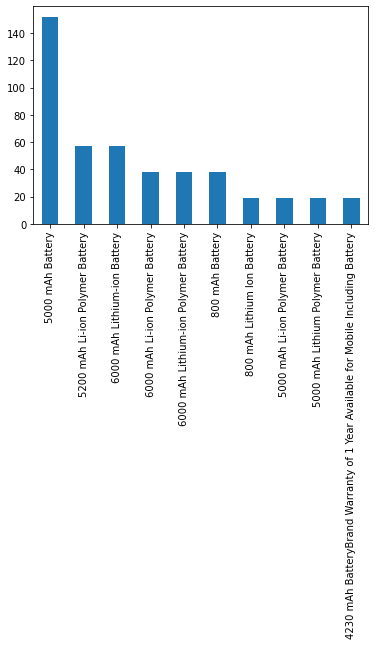

In [55]:
# Bar graph
df["Battery"].value_counts().head(10).plot(kind="bar")

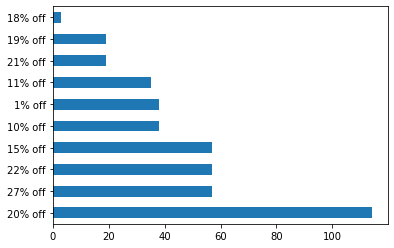

In [56]:
# Horizontal bar graph
df["Discount"].value_counts().head(10).plot(kind="barh")

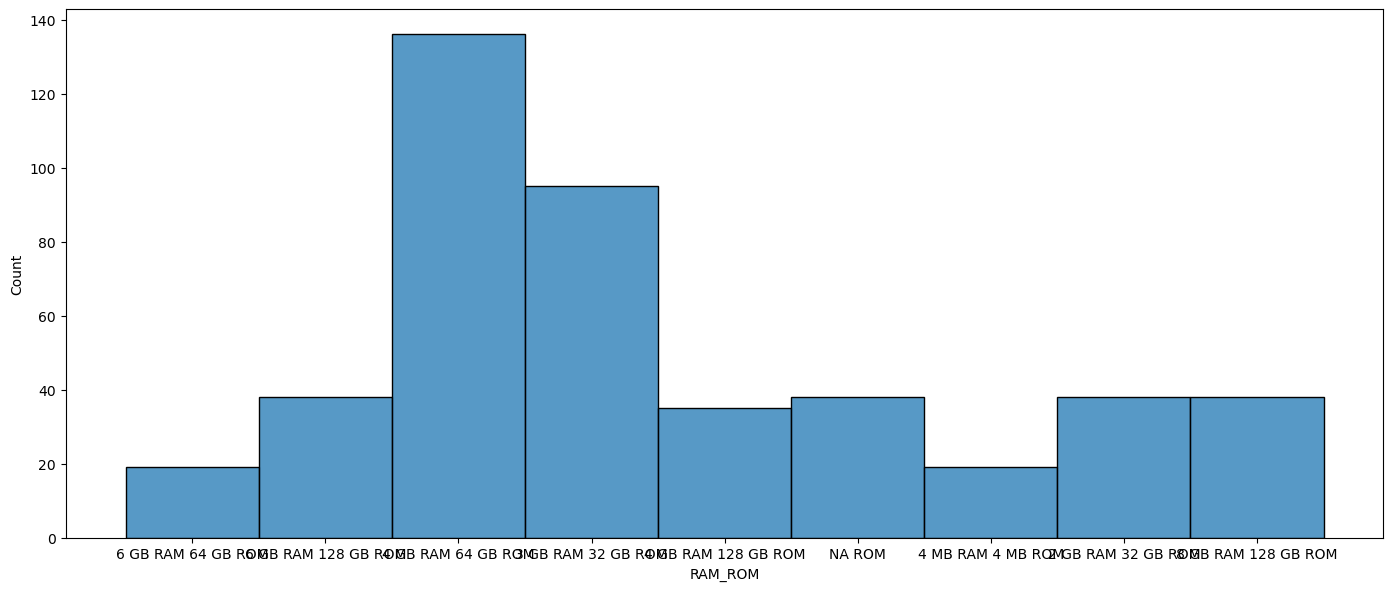

In [57]:
# Histogram
plt.figure(figsize=(17,7), dpi = 100)
sns.histplot(data =df,x ='RAM_ROM' );

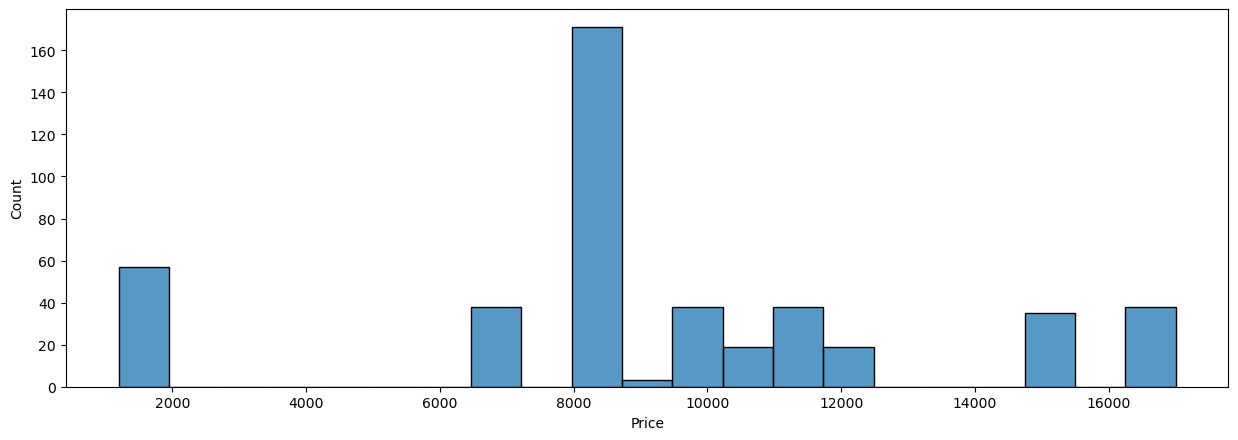

In [58]:
# Histogram
plt.figure(figsize=(15,5), dpi = 100)
sns.histplot(data =df,x ='Price' );

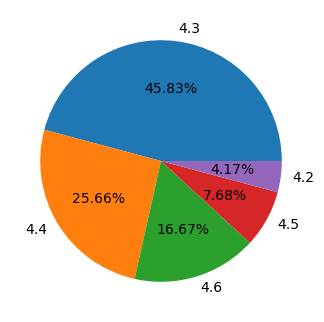

In [59]:
# Pie chart 

plt.figure(figsize=(15,4), dpi = 100)
plt.pie(df['Rating'].value_counts(),autopct='%.2f%%',labels=df['Rating'].unique());

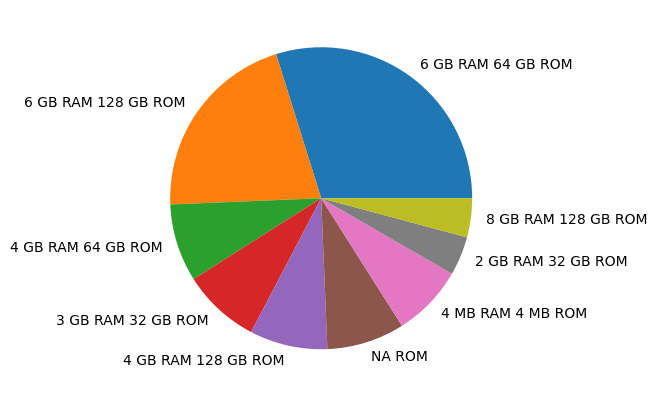

In [60]:
plt.figure(figsize=(10,5),dpi=100)
plt.pie(df['RAM_ROM'].value_counts(),labels=df['RAM_ROM'].unique());

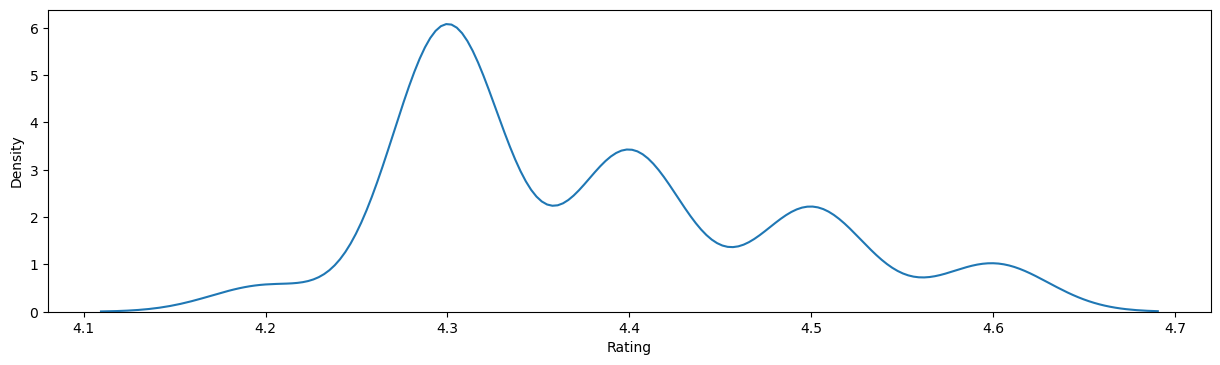

In [61]:
plt.figure(figsize=(15,4), dpi = 100)
sns.kdeplot(data = df,x ='Rating');

C:\Users\computer world\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


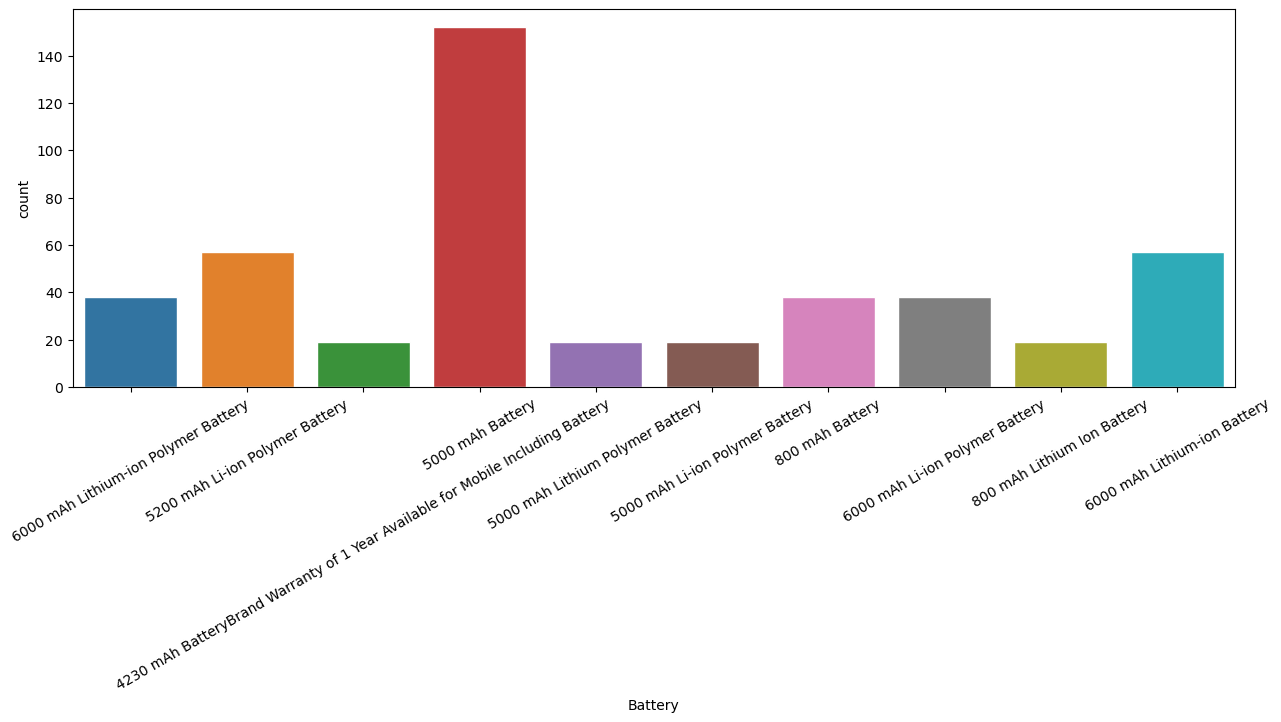

In [79]:
plt.figure(figsize=(15,5), dpi = 100)
sns.countplot(df['Battery'], edgecolor = 'white')
plt.xticks(rotation=30);

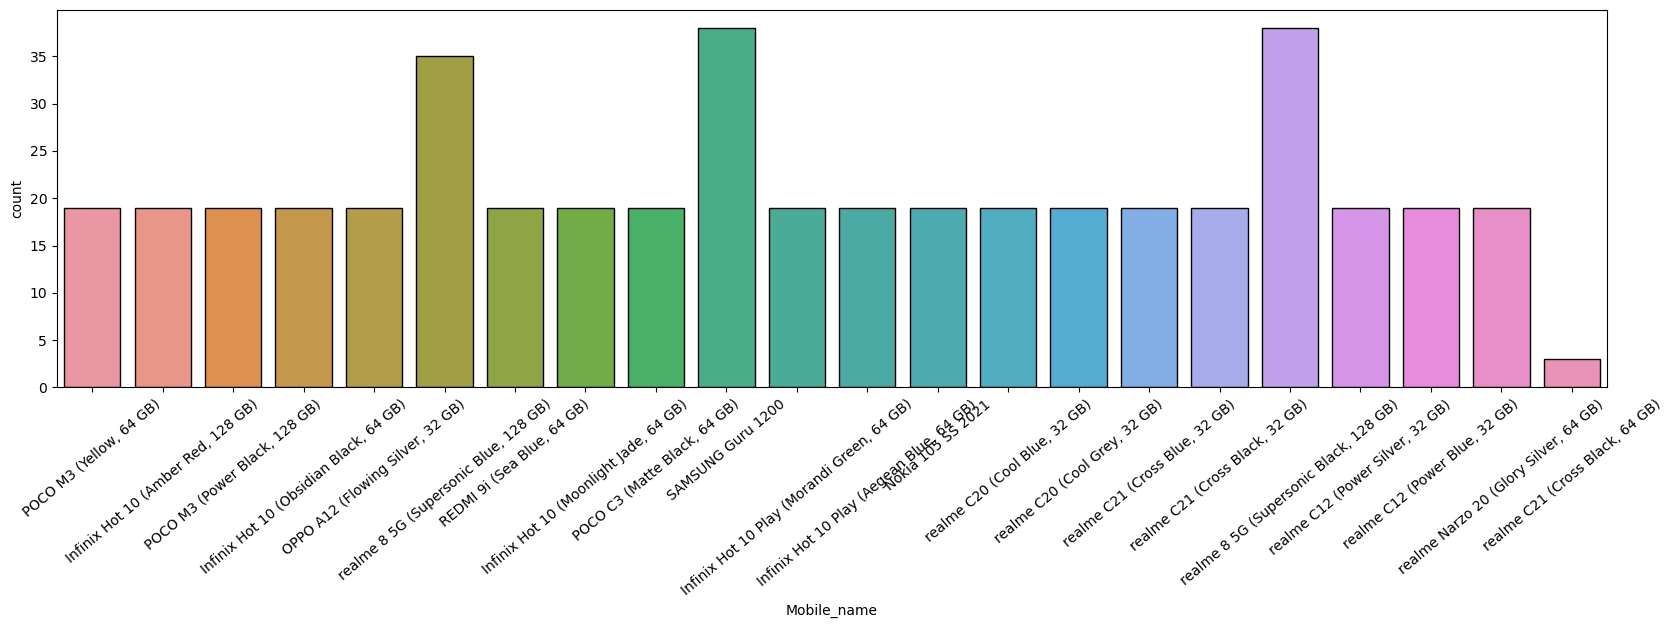

In [63]:
plt.figure(figsize=(20,5), dpi = 100)
sns.countplot(x=df['Mobile_name'], edgecolor = 'black')
plt.xticks(rotation=40);

## Bivariate analysis

<Figure size 6000x1500 with 0 Axes>

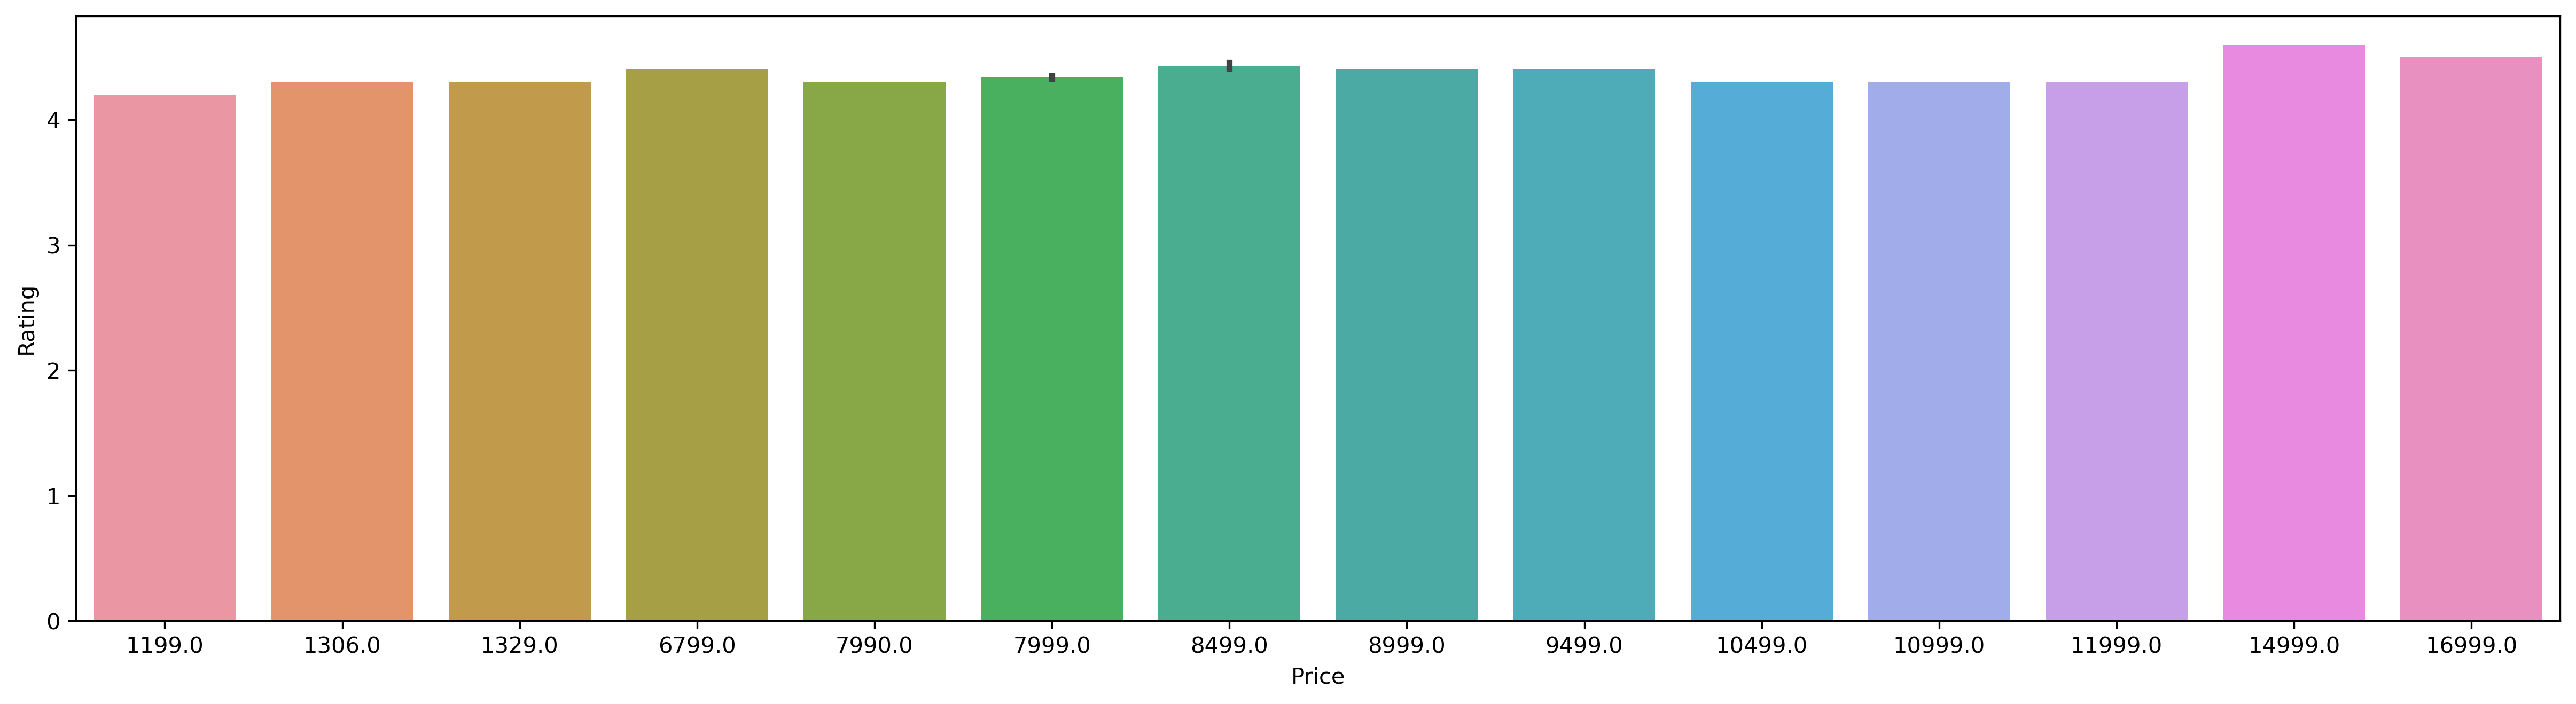

In [64]:
# Plotting single numeric columns

# Bar chart 
plt.figure(figsize=(20,5),dpi=300)
sns.barplot(x = df['Price'],y = df['Rating']);
plt.show()

<Figure size 2000x500 with 0 Axes>

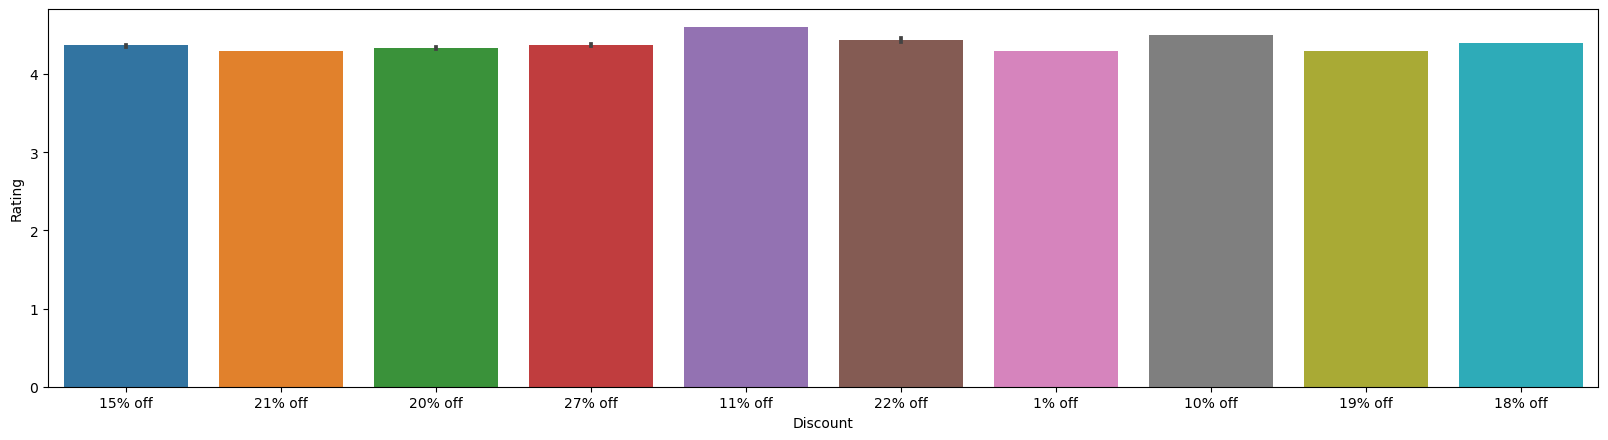

In [65]:
plt.figure(figsize=(20,5),dpi=100)
sns.barplot(x = df['Discount'],y = df['Rating']);
plt.show()

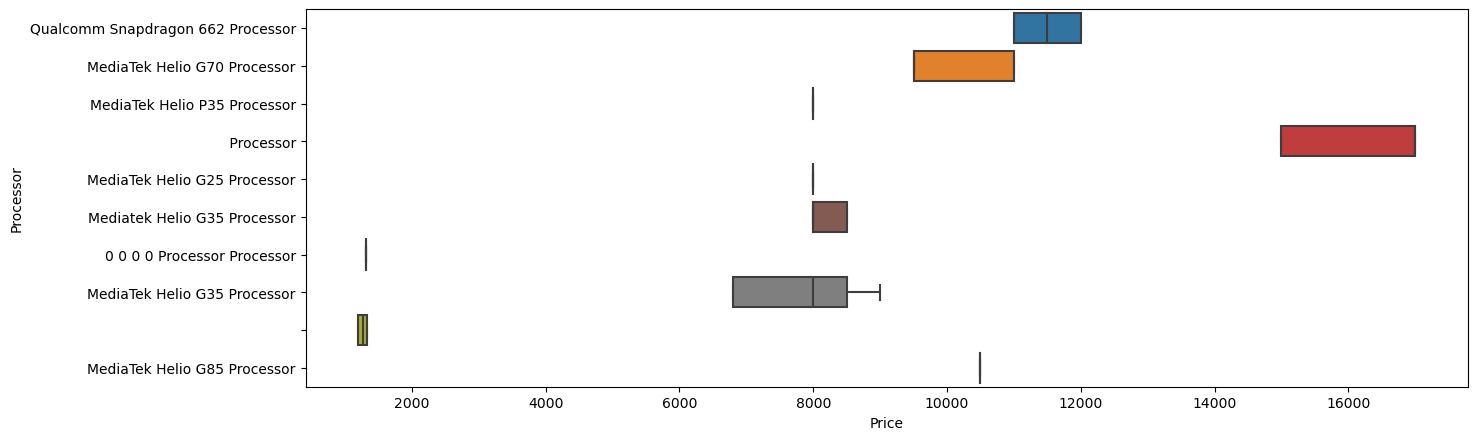

In [66]:
# Box plot
plt.figure(figsize=(15,5), dpi = 100)
sns.boxplot(data =df,x ='Price',y='Processor');

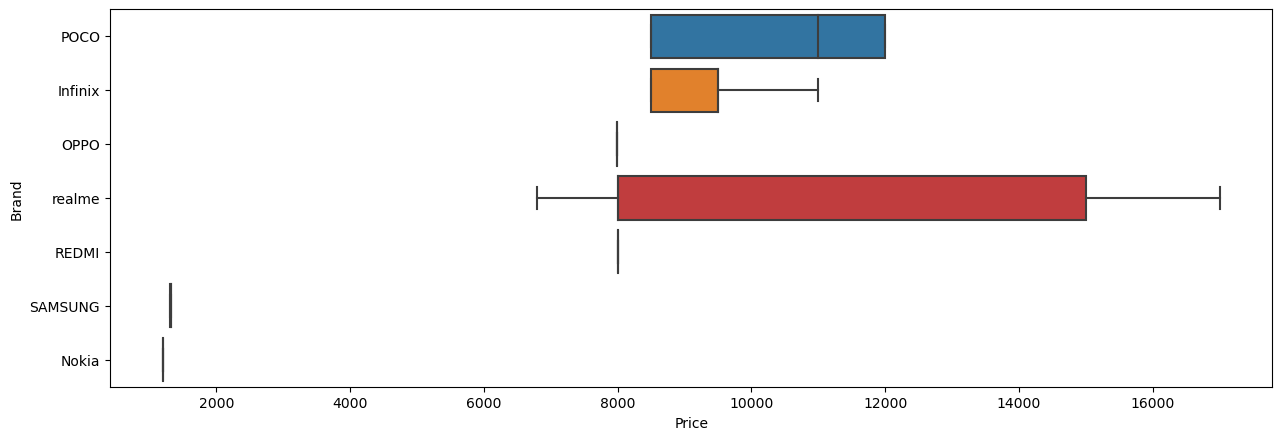

In [67]:
plt.figure(figsize=(15,5), dpi = 100)
sns.boxplot(data =df,x ='Price',y = 'Brand');

<Figure size 1080x360 with 0 Axes>

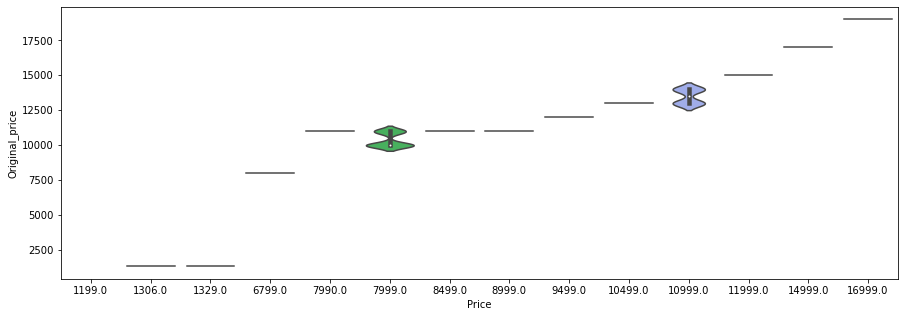

In [68]:
# Violinplot 
plt.figure(figsize = (15,5))
sns.violinplot(x = df['Price'],y = df['Original_price'])

<Figure size 1000x500 with 0 Axes>

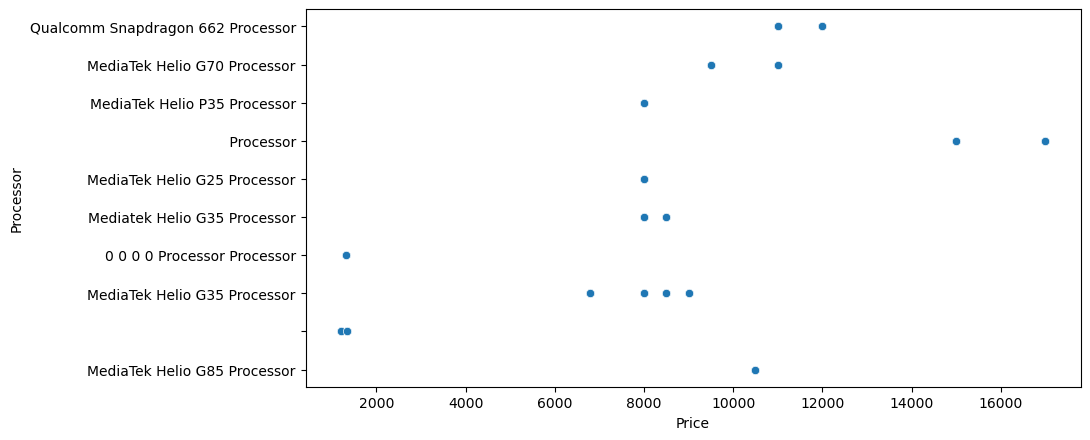

In [69]:
# Scatter plot
plt.figure(figsize=(10,5),dpi = 100)
sns.scatterplot(data=df, x="Price", y="Processor")

<Figure size 1000x500 with 0 Axes>

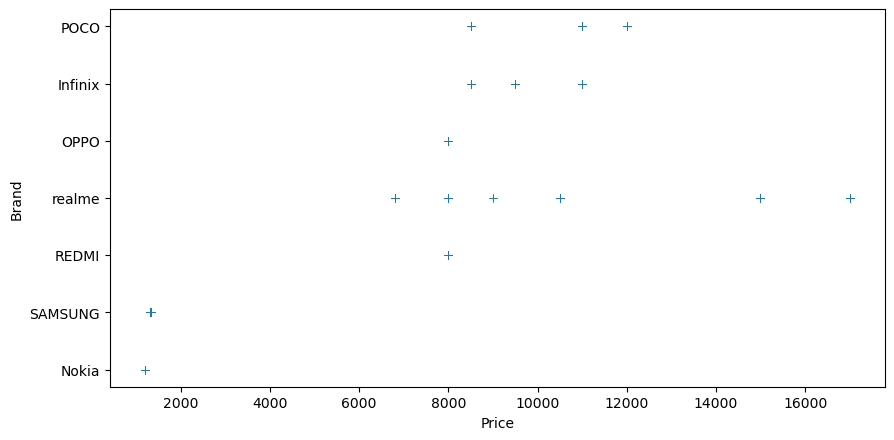

In [70]:
plt.figure(figsize=(10,5),dpi = 100)
sns.scatterplot(data=df, x="Price", y="Brand",marker="+")

## Multivariante

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

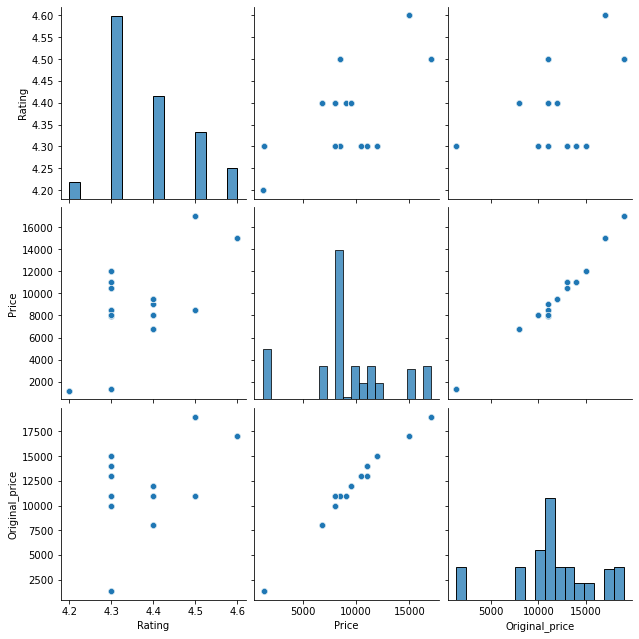

In [71]:
# Pairplot for whole dataframe 
plt.figure(figsize=(20,5),dpi = 100)
sns.pairplot(df,height = 3);
plt.show()

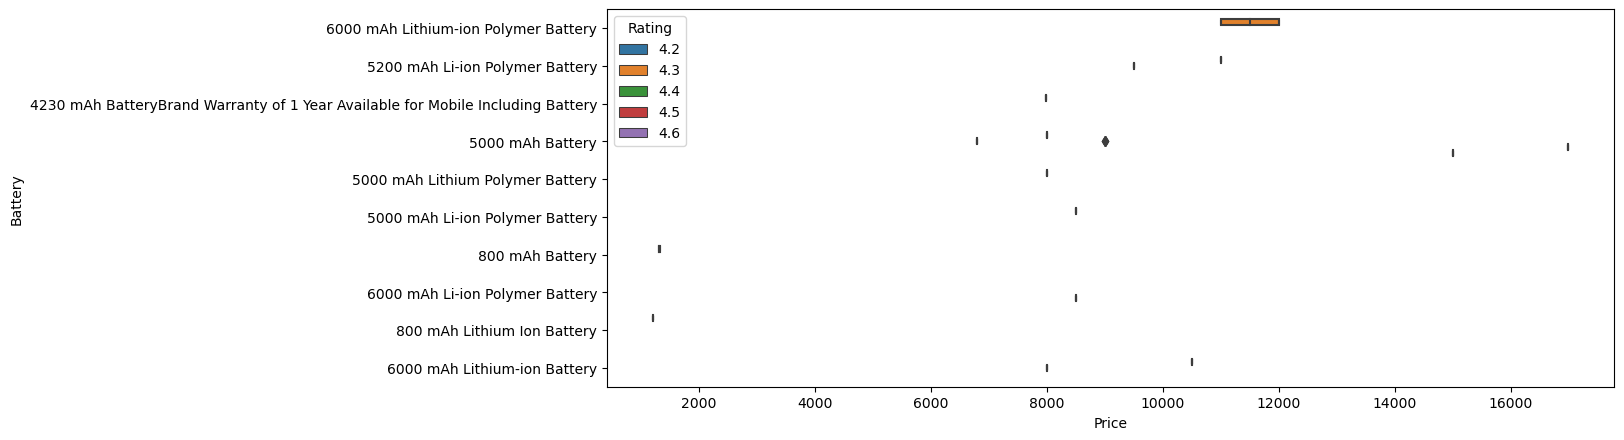

In [72]:
# Box plot
plt.figure(figsize=(13,5), dpi = 100)
sns.boxplot(data =df,x ='Price',y='Battery',hue = 'Rating');

In [73]:
# Heatmap
df1 = pd.DataFrame(np.random.random((4,4)), columns=['Price','Original_price','Rating','Discount'])

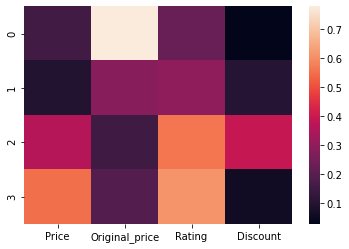

In [74]:
sns.heatmap(df1)

In [75]:
df2 = pd.DataFrame(np.random.random((3,3)), columns=['Processor','Battery','RAM_ROM'])

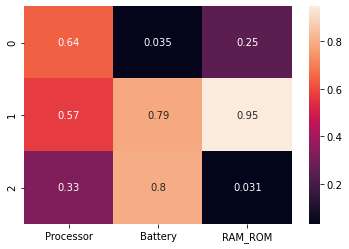

In [76]:
sns.heatmap(df2,annot = True)

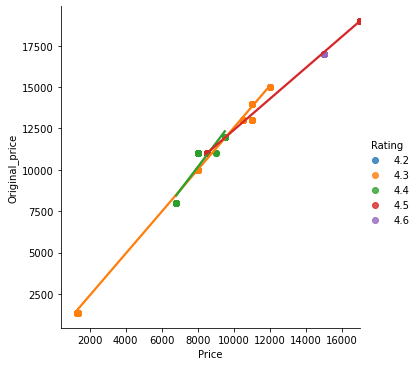

In [77]:
# Multivarient scatterplot
sns.lmplot(x='Price',y='Original_price',hue='Rating',data = df)